In [12]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
root = "competition_data"

In [14]:
train_cols = ['target', 'county', 'is_business', 'product_type', 'is_consumption', 'datetime', 'row_id']
df_train = pd.read_csv(os.path.join(root, 'train.csv'), usecols=train_cols, parse_dates=['datetime'])

df_train["category_1"] = df_train["county"].astype(str) + "_" + df_train["is_business"].astype(str) + "_" + df_train["product_type"].astype(str) + "_" + df_train["is_consumption"].astype(str)
df_train["log_target"] = np.log(df_train["target"] + 0.001)

In [15]:
all_times = pd.date_range(start=df_train["datetime"].min(), end=df_train["datetime"].max(), freq='H')

In [16]:
all_cat = list(set(df_train["category_1"]))
all_cat.sort()
df_dict = {}
sparse_df_dict = {}
for i, cat in enumerate(all_cat):
    df_dict[cat] = df_train[df_train["category_1"] == cat]
    
    # Fill in missing times with NAN
    df_dict[cat] = df_dict[cat].set_index("datetime").reindex(all_times).reset_index().rename(columns={"index": "datetime"})

    # Count and print the number of target values that are NAN in each category
    print("Category: {}, NAN count: {}".format(cat, df_dict[cat]["target"].isnull().sum()))
    if df_dict[cat]["target"].isnull().sum() > 8:
        sparse_df_dict[cat] = df_dict[cat]



Category: 0_0_1_0, NAN count: 4
Category: 0_0_1_1, NAN count: 4
Category: 0_0_2_0, NAN count: 4
Category: 0_0_2_1, NAN count: 4
Category: 0_0_3_0, NAN count: 4
Category: 0_0_3_1, NAN count: 4
Category: 0_1_0_0, NAN count: 4
Category: 0_1_0_1, NAN count: 4
Category: 0_1_1_0, NAN count: 4
Category: 0_1_1_1, NAN count: 4
Category: 0_1_2_0, NAN count: 724
Category: 0_1_2_1, NAN count: 724
Category: 0_1_3_0, NAN count: 4
Category: 0_1_3_1, NAN count: 4
Category: 10_0_1_0, NAN count: 4
Category: 10_0_1_1, NAN count: 4
Category: 10_0_3_0, NAN count: 4
Category: 10_0_3_1, NAN count: 4
Category: 10_1_1_0, NAN count: 4
Category: 10_1_1_1, NAN count: 4
Category: 10_1_2_0, NAN count: 9242
Category: 10_1_2_1, NAN count: 9242
Category: 10_1_3_0, NAN count: 4
Category: 10_1_3_1, NAN count: 4
Category: 11_0_1_0, NAN count: 4
Category: 11_0_1_1, NAN count: 4
Category: 11_0_2_0, NAN count: 1204
Category: 11_0_2_1, NAN count: 1204
Category: 11_0_3_0, NAN count: 4
Category: 11_0_3_1, NAN count: 4
Category

In [17]:
sparse_df_dict["0_1_2_0"].head()

,datetime,county,is_business,product_type,target,is_consumption,row_id,category_1,log_target
0,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


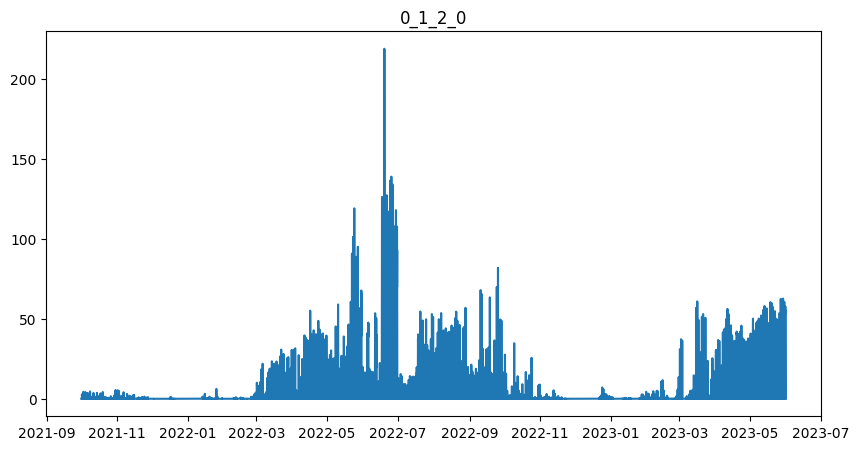

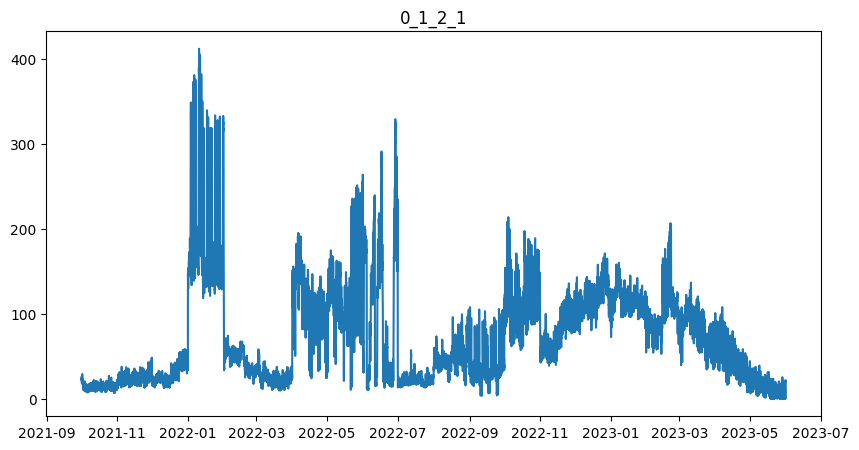

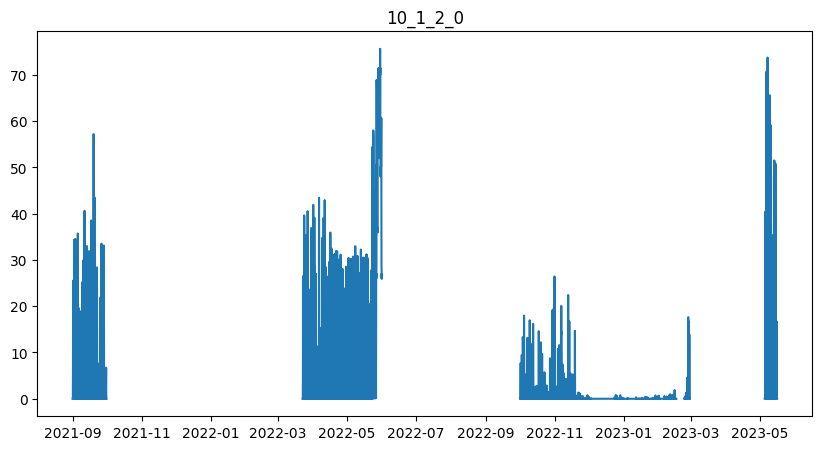

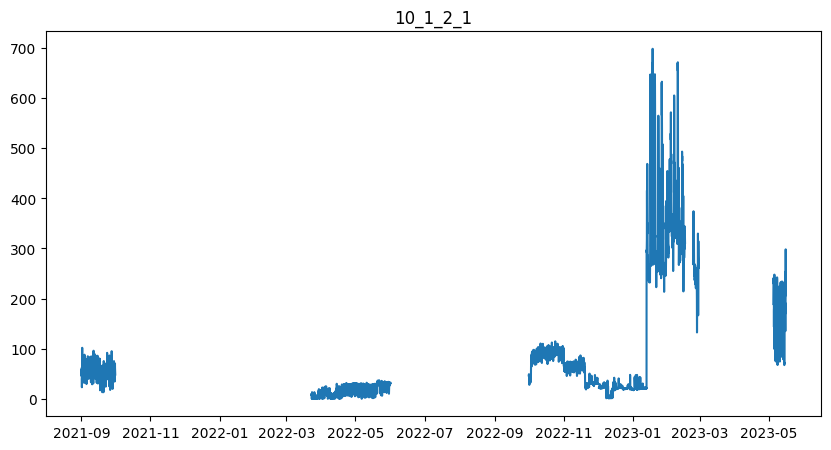

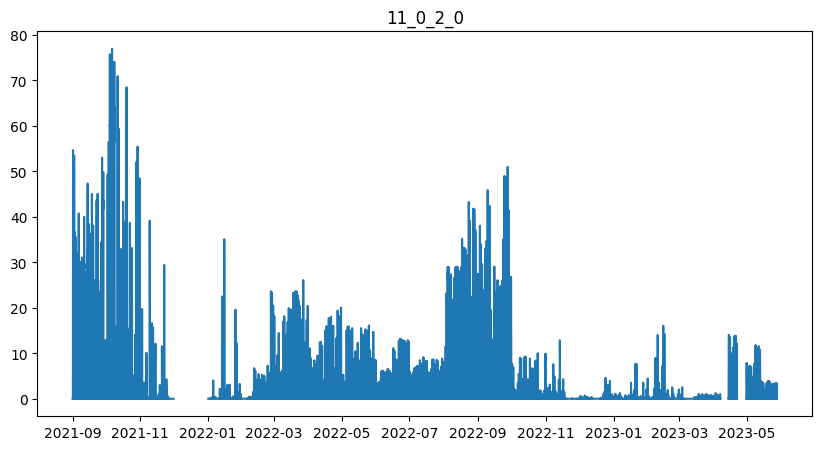

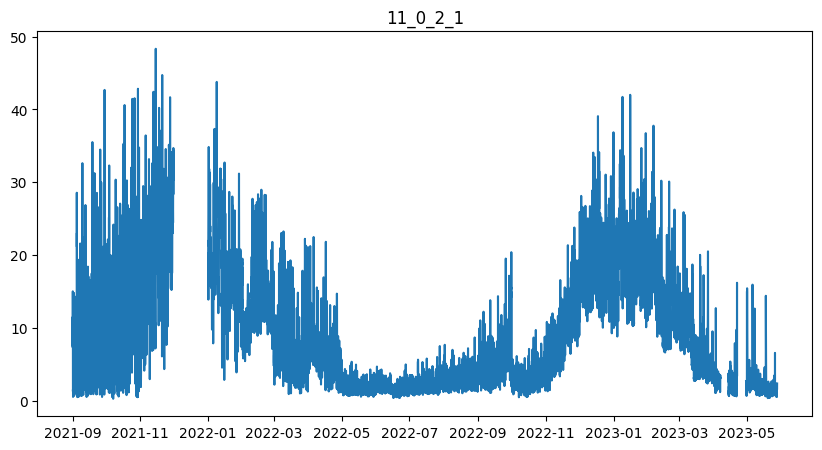

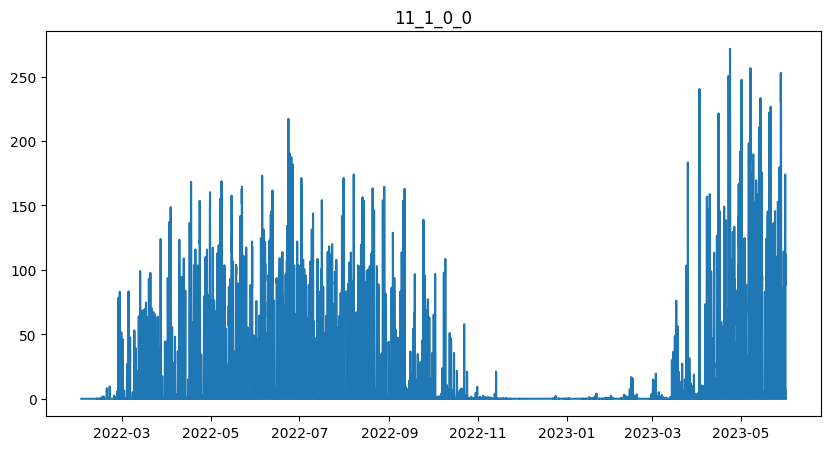

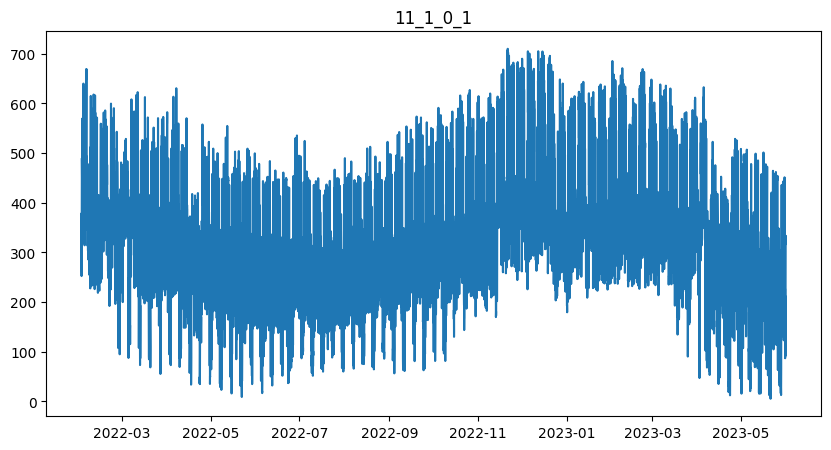

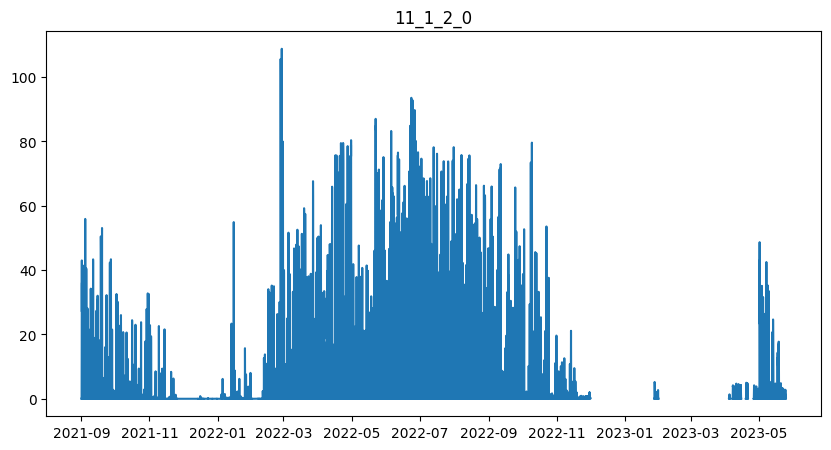

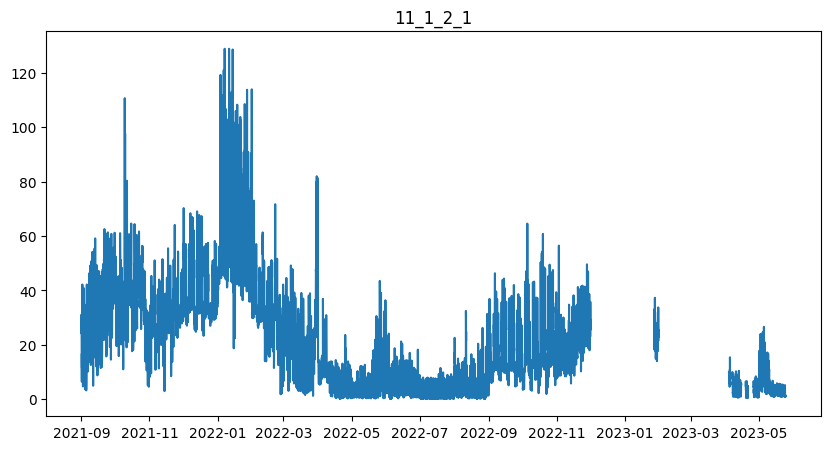

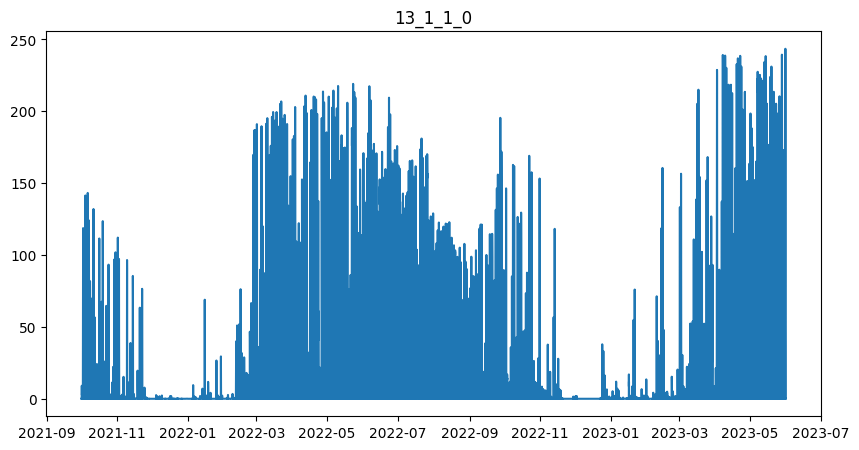

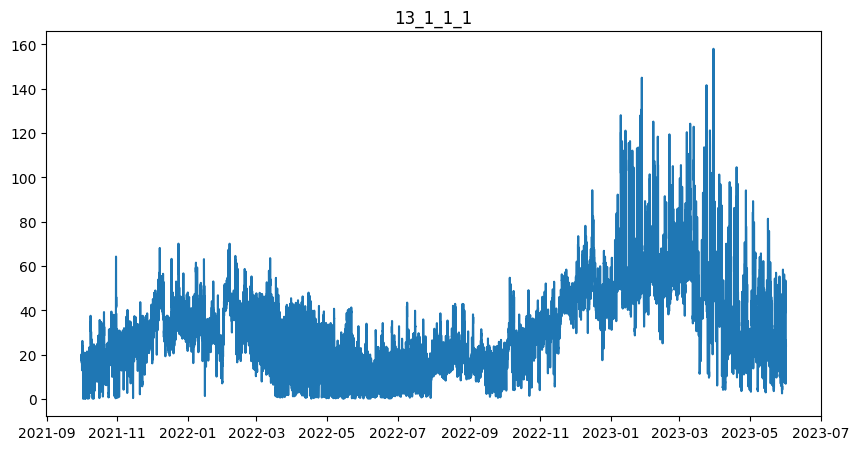

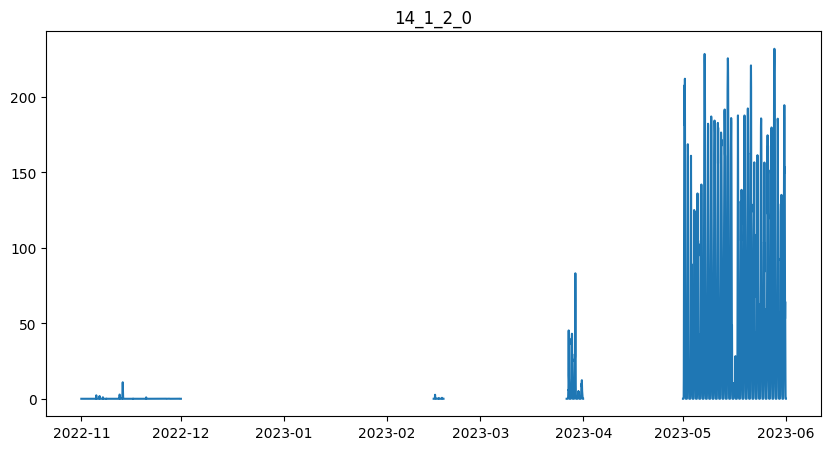

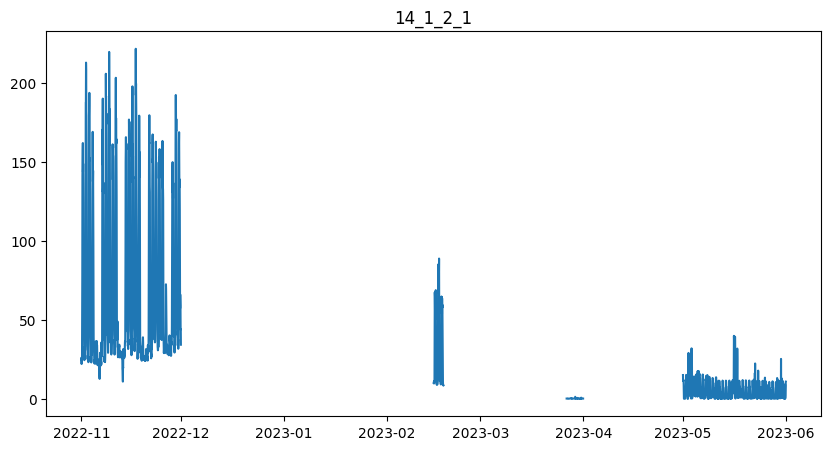

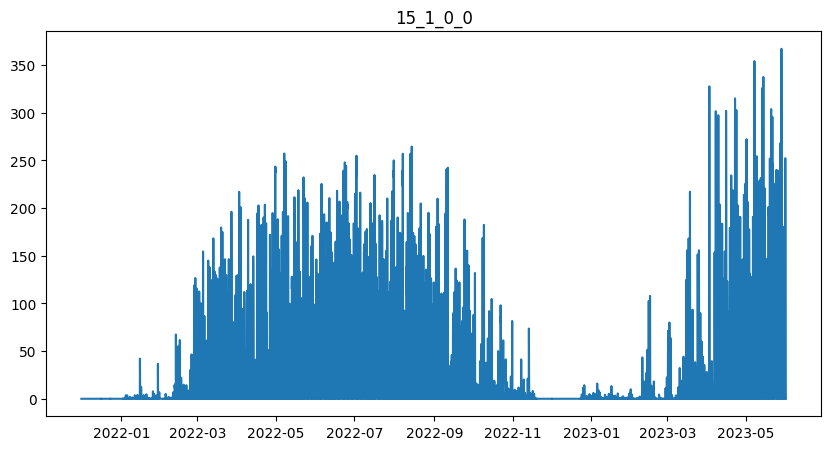

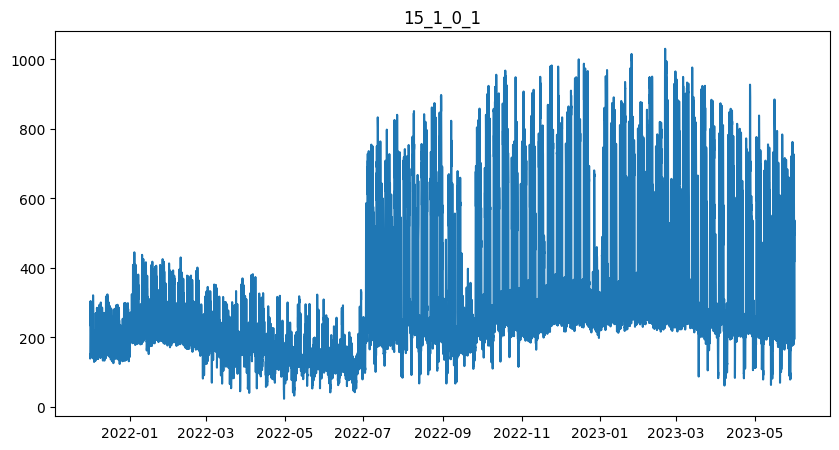

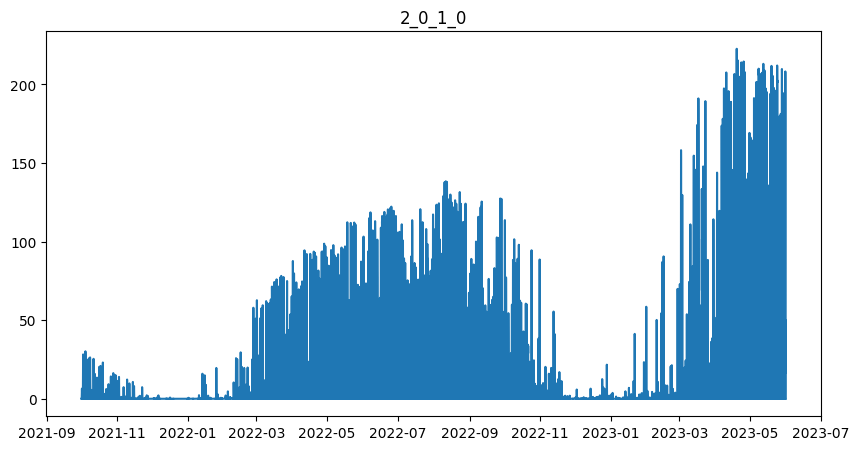

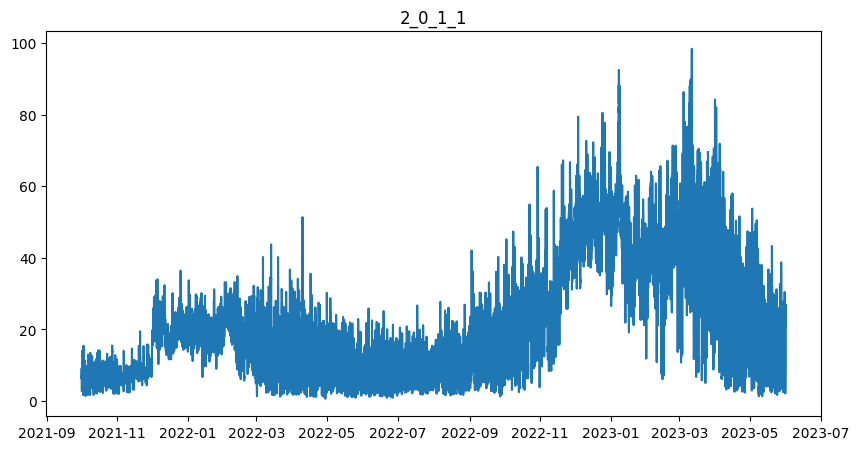

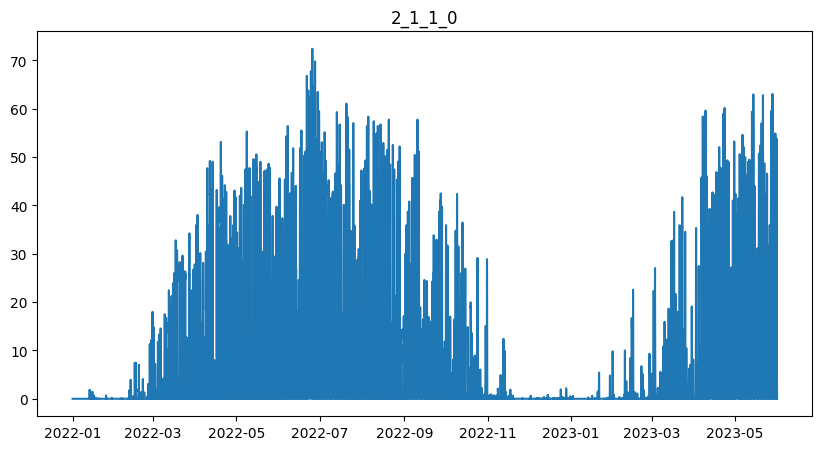

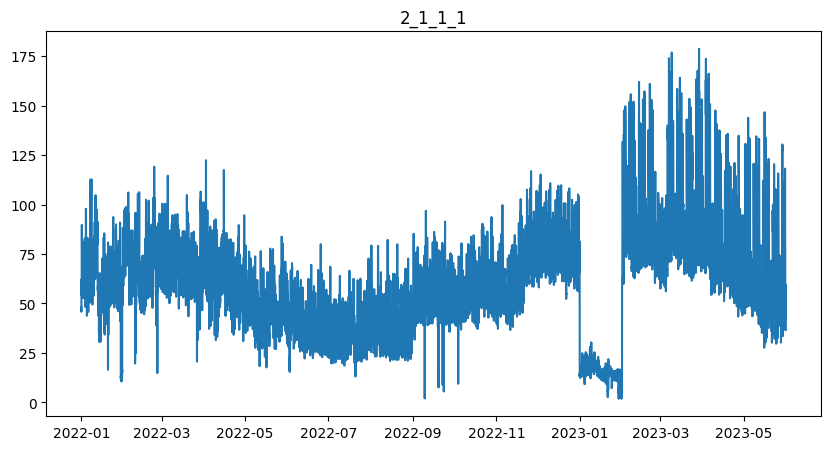

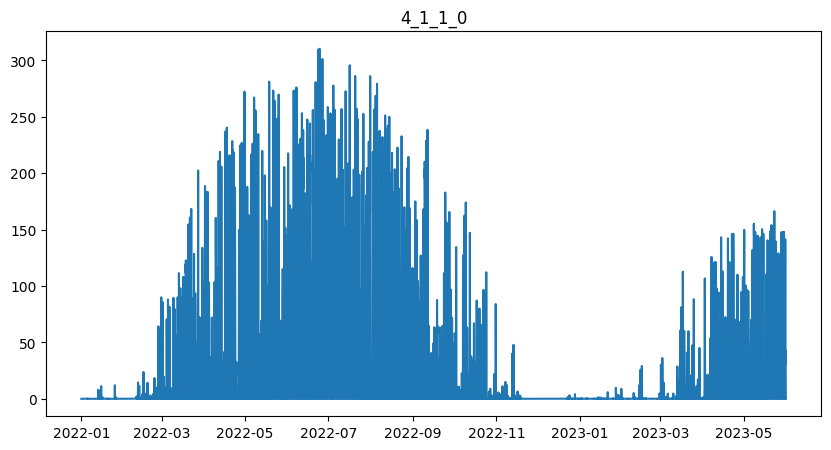

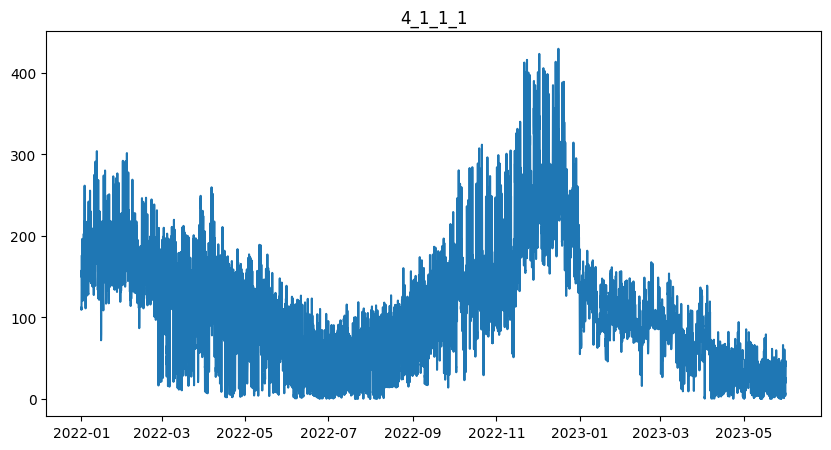

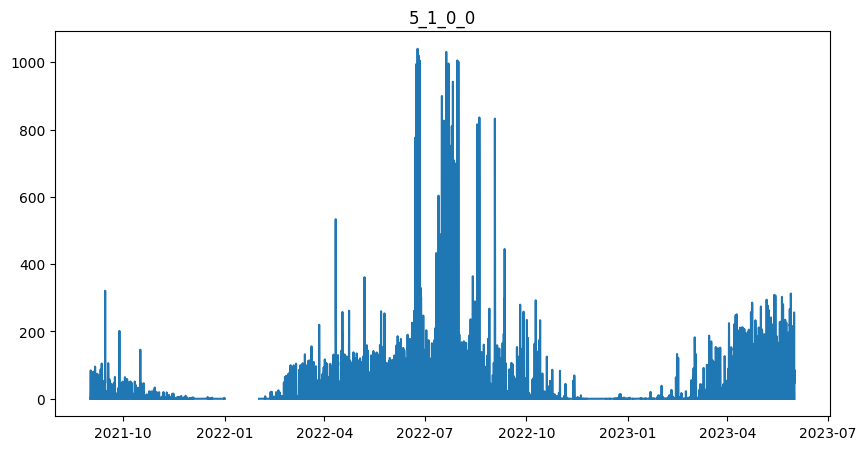

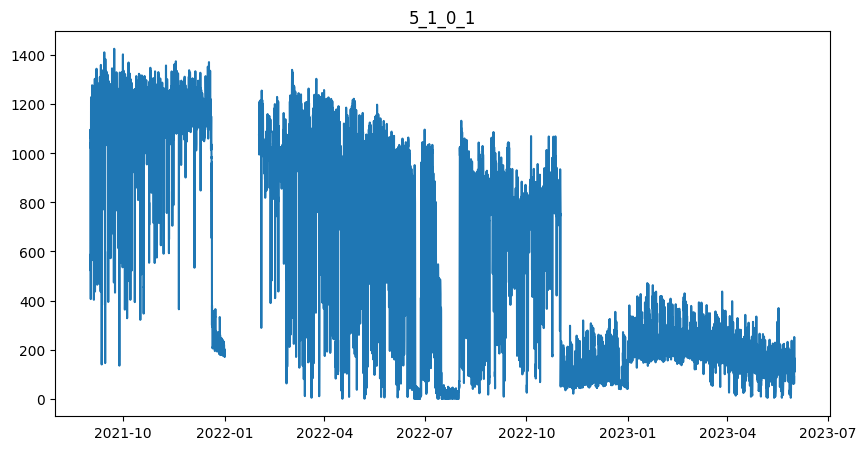

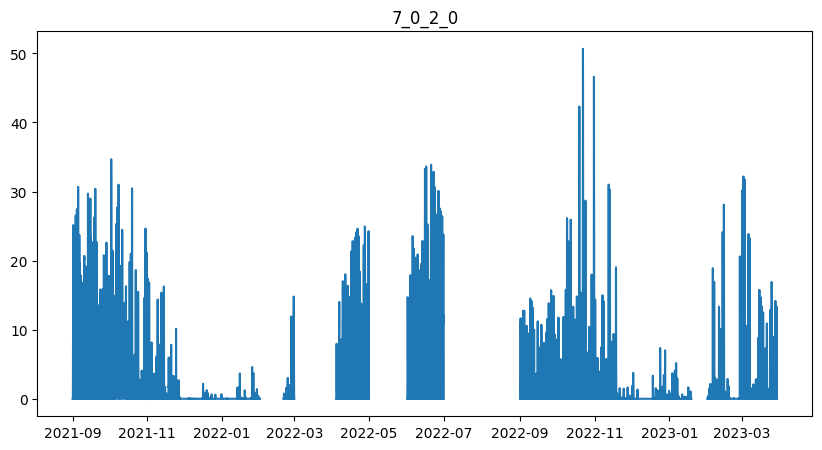

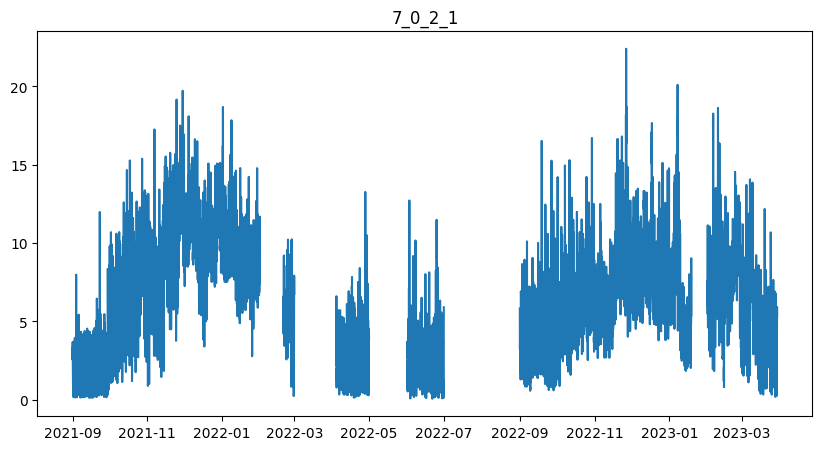

In [18]:
sparse_cat = list(sparse_df_dict.keys())
    
# Plot time series in a separate figure for each category and title the figure with the category name
for i, cat in enumerate(all_cat):
    if cat.startswith("13"):
        plt.figure(i, figsize=(10, 5))
        plt.title(cat)
        plt.plot(df_dict[cat]["datetime"], df_dict[cat]["target"])
        plt.show()
    # plt.figure(i, figsize=(10, 5))
    # plt.title(cat)
    # plt.plot(sparse_df_dict[cat]["datetime"], sparse_df_dict[cat]["target"])
    # plt.show()

In [19]:
# # Interpolate missing values
# # Strategy: linear interpolation of the log(target) values using the nearest weekly data available
# # Rationale: the data has a clear weekly pattern, so it makes sense to look 7 days ahead and behind for the nearest data, rather than next day or previous day
# def impute_target_values(df):
#     for i in range(168):
#         start_time = all_times[0] + pd.Timedelta(hours=i)
#         weekly_range = pd.date_range(start=start_time, end=all_times[-1], freq='w')
#         mini_df = df[df["datetime"].isin(weekly_range)]
#         mini_df["log_target"] = mini_df["log_target"].interpolate(method='linear', limit_direction='both')
#         df.update(mini_df["log_target"])

#     # Fill in the remaining NANs by interpolating linearly from the nearest data
#     df["log_target"] = df["log_target"].interpolate(method='linear', limit_direction='both', limit=168)
#     df["target"] = np.exp(df["log_target"]) - 0.001
#     return df

In [20]:
# for i, cat in enumerate(sparse_cat):
#     sparse_df_dict[cat] = impute_target_values(sparse_df_dict[cat])
#     plt.figure(i)
#     plt.title(cat)
#     plt.plot(sparse_df_dict[cat]["datetime"], sparse_df_dict[cat]["target"])
#     plt.show()

In [21]:
for i, cat in enumerate(all_cat):
    print(cat)
    print(df_dict[cat]["target"].max())
    print(df_dict[cat]["target"].min())

0_0_1_0
3445.013
0.0
0_0_1_1
1638.667
22.972
0_0_2_0
113.911
0.0
0_0_2_1
76.821
0.644
0_0_3_0
11255.665
0.0
0_0_3_1
4544.723
74.499
0_1_0_0
627.574
0.0
0_1_0_1
2651.774
0.0
0_1_1_0
1665.502
0.0
0_1_1_1
2318.481
74.661
0_1_2_0
218.881
0.0
0_1_2_1
411.835
0.0
0_1_3_0
10533.91
0.0
0_1_3_1
15480.274
2337.637
10_0_1_0
569.614
0.0
10_0_1_1
142.316
0.842
10_0_3_0
1960.014
0.0
10_0_3_1
468.921
3.248
10_1_1_0
294.024
0.0
10_1_1_1
431.225
0.114
10_1_2_0
75.614
0.0
10_1_2_1
698.319
0.001
10_1_3_0
1547.791
0.0
10_1_3_1
2248.156
168.808
11_0_1_0
1234.168
0.0
11_0_1_1
533.653
4.975
11_0_2_0
76.95
0.0
11_0_2_1
48.327
0.244
11_0_3_0
5676.121
0.0
11_0_3_1
1688.477
13.283
11_1_0_0
271.52
0.0
11_1_0_1
709.663
5.06
11_1_1_0
1086.033
0.0
11_1_1_1
1657.315
13.368
11_1_2_0
108.779
0.0
11_1_2_1
128.848
0.091
11_1_3_0
5268.284
0.0
11_1_3_1
10944.4
1198.957
12_1_3_0
430.484
0.0
12_1_3_1
1116.119
158.951
13_0_1_0
142.468
0.0
13_0_1_1
42.234
0.004
13_0_3_0
795.908
0.0
13_0_3_1
274.487
0.949
13_1_1_0
243.38
0.0
13

In [22]:
# There are exactly 16 counties in Estonia - we don't need to worry about unseen county data
for i in range(16):
    county_df = df_train[df_train["county"] == i]
    print("County: {}".format(i))
    print(len(county_df[county_df["is_consumption"] == 1]))
    print(len(county_df[county_df["is_consumption"] == 0]))
    print(county_df["target"].isnull().sum())

County: 0
106464
106464
56
County: 1
45936
45936
24
County: 2
57600
57600
30
County: 3
61248
61248
32
County: 4
73632
73632
38
County: 5
75816
75816
40
County: 6
15312
15312
8
County: 7
86544
86544
46
County: 8
45936
45936
24
County: 9
61248
61248
32
County: 10
67320
67320
36
County: 11
99000
99000
52
County: 12
15312
15312
8
County: 13
60528
60528
32
County: 14
62904
62904
32
County: 15
74376
74376
38
